In [1]:
import numpy as np
from scipy import linalg, signal
import matplotlib.pyplot as plt
np.set_printoptions(precision=5, suppress=True)
plt.rcParams.update({
    'font.family':'Times New Roman',
    # 'text.usetex': True
})
rng = np.random.default_rng()
from LMS_algorithm import LMS

# Problem 6

In [2]:
b = np.zeros(13, dtype=int)
b[0] = 1
b[-1] = -1
pi = np.pi
sigma2_v = 1
sigma2_n = 1e-3
a = np.array([1, 1])
N = 12
mu_max = 1/(1)*sigma2_v*np.sqrt(pi*sigma2_n/2)
K = 1000  # number of iterations
print('the mu value: %.3f' % mu_max)

the mu value: 0.040


In [3]:
# verify the b
print(b)

[ 1  0  0  0  0  0  0  0  0  0  0  0 -1]


In [4]:
# give the theory solution
print(np.convolve(b, [(-1)**i for i in range(13)])[:13])

[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  0]


In [5]:
def plot_learning_curve(K):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    e2db_avg = 10 * np.log10(np.where(mse_avg == 0, float('inf'), mse_avg))
    ax1.plot(e2db_avg)
    ax2.plot(np.real(wk_avg))
    ax2.grid(color='lightgrey', linestyle='-', linewidth=1)
    plt.tight_layout()
    ax1.set_title('Learning Curve for MSE')
    ax1.set_xlabel('Number of iterations, k')
    ax1.set_ylabel('MSE [dB]')
    ax1.set_xlim(0, K)
    ax2.set_xlim(0, K)
    plt.show()

## LMS

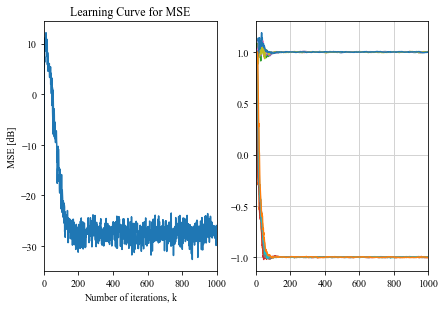

In [6]:
mse = []
wk_rec = []
for j in range(20):
    ex6 = LMS(N - 1, signal_complex=False)
    u = np.sqrt(sigma2_v) * rng.standard_normal(K)
    x = u
    d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
    wk, ek = ex6.lms(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': 1/(2+N)/2})

    mse.append(abs(ek) ** 2)
    wk_rec.append(wk)

wk_avg = np.mean(wk_rec, axis=0)[:K]
mse_avg = np.mean(mse, axis=0)[:K]

plot_learning_curve(K)

## 对比 $ \mu/2,\,\mu/5,\,\mu/10 $

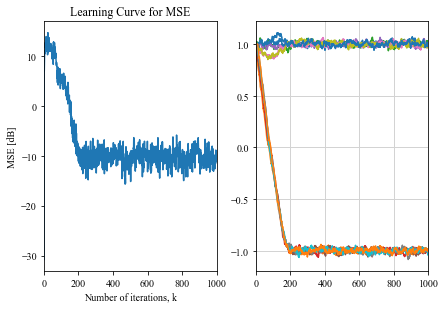

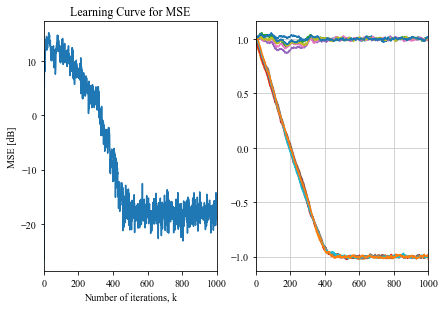

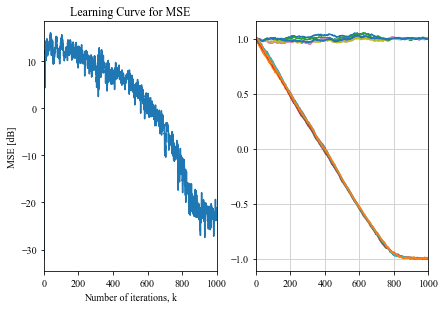

In [7]:
for mu in mu_max*np.array([0.5, 0.2, 0.1]):
    mse = []
    wk_rec = []
    for j in range(20):
        ex6 = LMS(N - 1, signal_complex=False)
        u = np.sqrt(sigma2_v) * rng.standard_normal(K)
        x = u
        d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
        wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu})

        mse.append(abs(ek) ** 2)
        wk_rec.append(wk)

    wk_avg = np.mean(wk_rec, axis=0)[:K]
    mse_avg = np.mean(mse, axis=0)[:K]

    plot_learning_curve(K)

## 收敛对比结论

- 与 LMS 相比，收敛曲线呈现不同。
- 符号误差算法的三个收敛情况比 LMS $\mu= 1/(2+N)*0.5 $ 时的收敛慢。
- 随着 $\mu$ 减小，符号误差算法收敛变慢。

## 计算失调对比

In [8]:
for mu in mu_max*np.array([0.5, 0.2, 0.1]):
    mse = []
    wk_rec = []
    for j in range(20):
        ex6 = LMS(N - 1, signal_complex=False)
        u = np.sqrt(sigma2_v) * rng.standard_normal(K)
        x = u
        d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
        wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu})

        mse.append(abs(ek) ** 2)
        wk_rec.append(wk)

    wk_avg = np.mean(wk_rec, axis=0)[:K]
    mse_avg = np.mean(mse, axis=0)[:K]
    
    xi = np.mean(mse_avg[-100:])/sigma2_n-1  # M experimental
    print('Case for mu = %.3f' % mu)
    print('experiment Misadjustment: %.4f' % xi)
    xi0 = mu*N/np.sqrt(pi/sigma2_n/2)  # M theoretical
    print('theory Misadjustment with Eq(4.28): %.4f' % xi0)
    print('-'*30)

Case for mu = 0.020
experiment Misadjustment: 106.8954
theory Misadjustment with Eq(4.28): 0.0060
------------------------------
Case for mu = 0.008
experiment Misadjustment: 16.5809
theory Misadjustment with Eq(4.28): 0.0024
------------------------------
Case for mu = 0.004
experiment Misadjustment: 4.5449
theory Misadjustment with Eq(4.28): 0.0012
------------------------------


## FIR 频率响应

In [9]:
# give the theory solution
print(np.convolve(b, [(-1)**i for i in range(13)])[:13])

# compute with the sign-error algorithm
print(wk_avg[-1].round(0).astype(int))

[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  0]
[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


# Problem 7

Case for mu = 0.020
experiment Misadjustment: 4407.8606
theory Misadjustment with Eq(4.28): 0.0040
------------------------------


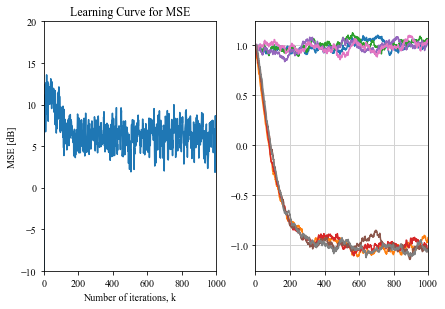

Case for mu = 0.008
experiment Misadjustment: 4050.2456
theory Misadjustment with Eq(4.28): 0.0016
------------------------------


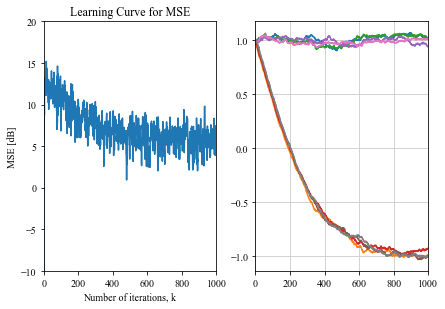

Case for mu = 0.004
experiment Misadjustment: 4240.6861
theory Misadjustment with Eq(4.28): 0.0008
------------------------------


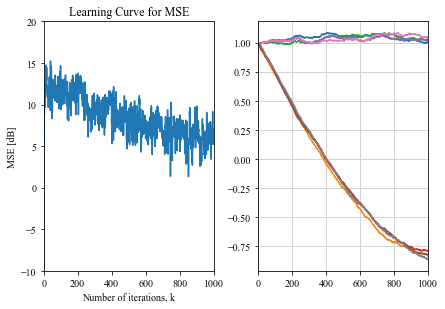

In [10]:
N = 8
for mu in mu_max*np.array([0.5, 0.2, 0.1]):
    mse = []
    wk_rec = []
    for j in range(20):
        ex6 = LMS(N - 1, signal_complex=False)
        u = np.sqrt(sigma2_v) * rng.standard_normal(K)
        x = u
        d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
        wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu})

        mse.append(abs(ek) ** 2)
        wk_rec.append(wk)

    wk_avg = np.mean(wk_rec, axis=0)[:K]
    mse_avg = np.mean(mse, axis=0)[:K]
    
    xi = np.mean(mse_avg[-100:])/sigma2_n-1  # M experimental
    print('Case for mu = %.3f' % mu)
    print('experiment Misadjustment: %.4f' % xi)
    xi0 = mu*N/np.sqrt(pi/sigma2_n/2)  # M theoretical
    print('theory Misadjustment with Eq(4.28): %.4f' % xi0)
    print('-'*30)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    e2db_avg = 10 * np.log10(np.where(mse_avg == 0, float('inf'), mse_avg))
    ax1.plot(e2db_avg)
    ax2.plot(np.real(wk_avg))
    ax2.grid(color='lightgrey', linestyle='-', linewidth=1)
    plt.tight_layout()
    ax1.set_title('Learning Curve for MSE')
    ax1.set_xlabel('Number of iterations, k')
    ax1.set_ylabel('MSE [dB]')
    ax1.set_xlim(0, K)
    ax1.set_ylim(-10, 20)
    ax2.set_xlim(0, K)
    plt.show()

- 系数少了，失调较大，收敛较慢，同条件下。

# Problem 8

In [11]:
b = np.ones(1, dtype=int)
pi = np.pi
sigma2_v = 1
sigma2_n = 1e-3
a = np.array([1, -0.9])
N = 12
mu_max = 1/(1)*sigma2_v*np.sqrt(pi*sigma2_n/2)
K = 1000  # number of iterations
print('the mu value: %.3f' % mu_max)

the mu value: 0.040


In [12]:
# give the theory solution
print(np.convolve(b, [(0.9)**i for i in range(13)])[:13])

[1.      0.9     0.81    0.729   0.6561  0.59049 0.53144 0.4783  0.43047
 0.38742 0.34868 0.31381 0.28243]


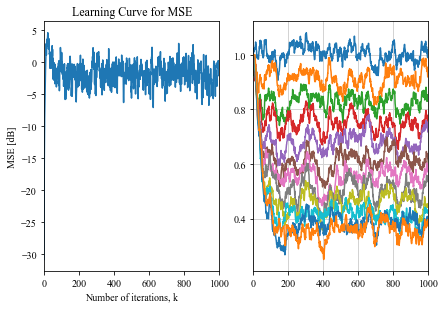

Case for mu = 0.020
experiment Misadjustment: 610.9310
theory Misadjustment with Eq(4.28): 0.0060
[1.00889 0.93346 0.84729 0.77817 0.72793 0.59837 0.57007 0.54281 0.44206
 0.42974 0.37781 0.38573]
------------------------------


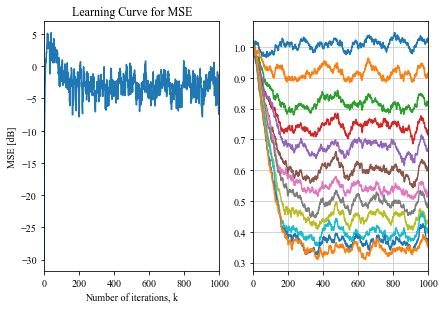

Case for mu = 0.008
experiment Misadjustment: 530.8670
theory Misadjustment with Eq(4.28): 0.0024
[1.0217  0.91177 0.81867 0.72272 0.67019 0.60867 0.53028 0.48967 0.43732
 0.40188 0.35293 0.34857]
------------------------------


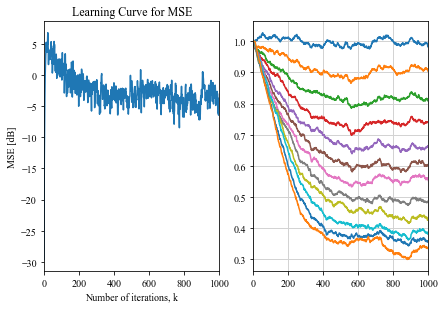

Case for mu = 0.004
experiment Misadjustment: 534.4156
theory Misadjustment with Eq(4.28): 0.0012
[0.98171 0.9032  0.8088  0.74129 0.66423 0.60416 0.55287 0.48564 0.42679
 0.38695 0.35967 0.33719]
------------------------------


In [13]:
for mu in mu_max*np.array([0.5, 0.2, 0.1]):
    mse = []
    wk_rec = []
    for j in range(20):
        ex6 = LMS(N - 1, signal_complex=False)
        u = np.sqrt(sigma2_v) * rng.standard_normal(K)
        x = u
        d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
        wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu})

        mse.append(abs(ek) ** 2)
        wk_rec.append(wk)

    wk_avg = np.mean(wk_rec, axis=0)[:K]
    mse_avg = np.mean(mse, axis=0)[:K]

    plot_learning_curve(K)
    xi = np.mean(mse_avg[-100:])/sigma2_n-1  # M experimental
    print('Case for mu = %.3f' % mu)
    print('experiment Misadjustment: %.4f' % xi)
    xi0 = mu*N/np.sqrt(pi/sigma2_n/2)  # M theoretical
    print('theory Misadjustment with Eq(4.28): %.4f' % xi0)
    print(wk_avg[-1])
    print('-'*30)

# Problem 9

## $\sigma_n^2 = 0$

In [14]:
b = np.zeros(13, dtype=int)
b[0] = 1
b[-1] = -1
pi = np.pi
sigma2_v = 1
sigma2_n = 1e-3
a = np.array([1, 1])
N = 12
mu_max = 1/(1)*sigma2_v*np.sqrt(pi*sigma2_n/2)
K = 1000  # number of iterations
print('the mu value: %.3f' % mu_max)

the mu value: 0.040


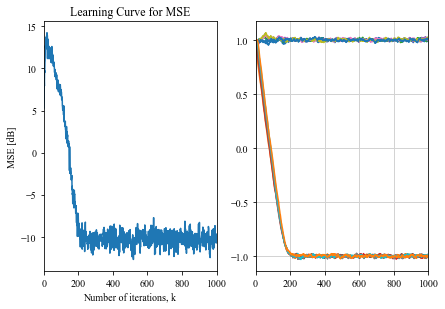

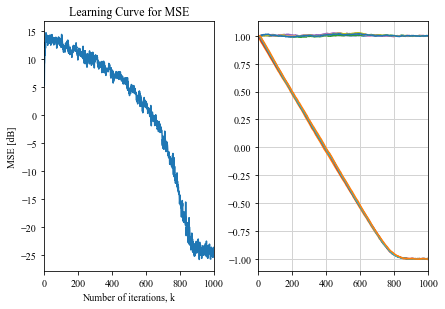

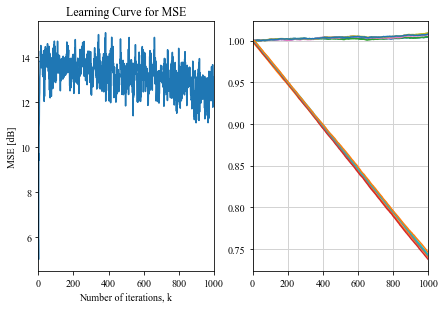

In [15]:
for mu in mu_max*np.array([0.5, .1, .01]):
    mse = []
    wk_rec = []
    for j in range(100):
        ex6 = LMS(N - 1, signal_complex=False)
        u = np.sqrt(sigma2_v) * rng.standard_normal(K)
        x = u
        d = signal.lfilter(b, a, x)
        wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu})

        mse.append(abs(ek) ** 2)
        wk_rec.append(wk)

    wk_avg = np.mean(wk_rec, axis=0)[:K]
    mse_avg = np.mean(mse, axis=0)[:K]

    plot_learning_curve(K)

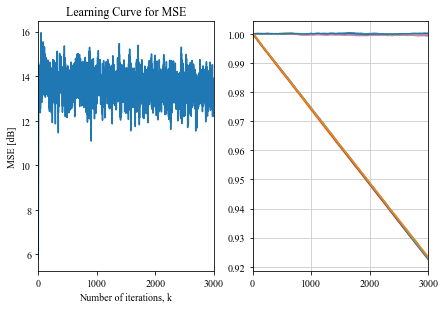

In [16]:
K = 3000
mse = []
wk_rec = []
for j in range(100):
    ex6 = LMS(N - 1, signal_complex=False)
    u = np.sqrt(sigma2_v) * rng.standard_normal(K)
    x = u
    d = signal.lfilter(b, a, x)
    wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu_max*0.001})

    mse.append(abs(ek) ** 2)
    wk_rec.append(wk)

wk_avg = np.mean(wk_rec, axis=0)[:K]
mse_avg = np.mean(mse, axis=0)[:K]

plot_learning_curve(K)

## $\sigma_n^2 = 1$

In [17]:
b = np.zeros(13, dtype=int)
b[0] = 1
b[-1] = -1
pi = np.pi
sigma2_v = 1
sigma2_n = 1
a = np.array([1, 1])
N = 12
mu_max = 1/(1)*sigma2_v*np.sqrt(pi*sigma2_n/2)
K = 1000  # number of iterations
print('the mu value: %.3f' % mu_max)

the mu value: 1.253


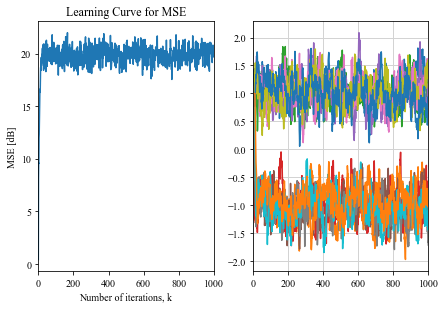

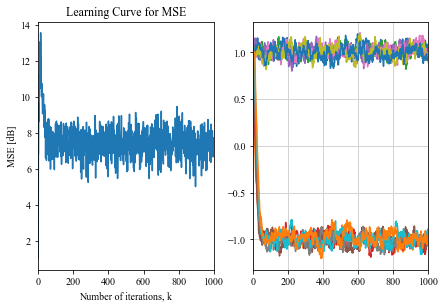

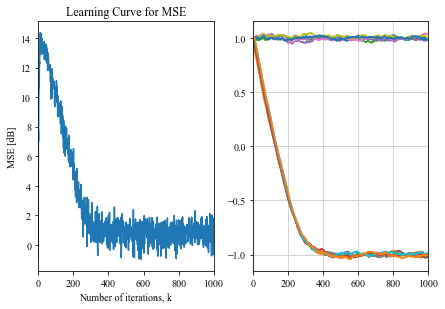

In [18]:
for mu in mu_max*np.array([0.5, .1, .01]):
    mse = []
    wk_rec = []
    for j in range(100):
        ex6 = LMS(N - 1, signal_complex=False)
        u = np.sqrt(sigma2_v) * rng.standard_normal(K)
        x = u
        d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
        wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu})

        mse.append(abs(ek) ** 2)
        wk_rec.append(wk)

    wk_avg = np.mean(wk_rec, axis=0)[:K]
    mse_avg = np.mean(mse, axis=0)[:K]

    plot_learning_curve(K)

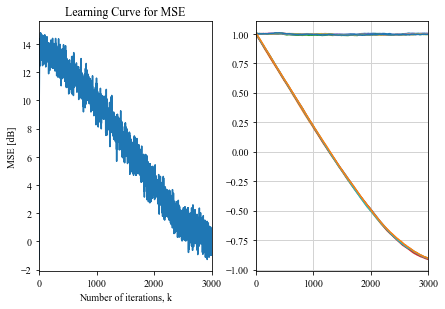

In [19]:
K = 3000
mse = []
wk_rec = []
for j in range(100):
    ex6 = LMS(N - 1, signal_complex=False)
    u = np.sqrt(sigma2_v) * rng.standard_normal(K)
    x = u
    d = signal.lfilter(b, a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
    wk, ek = ex6.sign_error(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu_max*0.001})

    mse.append(abs(ek) ** 2)
    wk_rec.append(wk)

wk_avg = np.mean(wk_rec, axis=0)[:K]
mse_avg = np.mean(mse, axis=0)[:K]

plot_learning_curve(K)

## 结论

- $\sigma_n^2=1$，MSE 的下界 $ 0 \;\mathrm{dB} $.
- $\sigma_n^2=0$，没有下界 MSE.
- 两个 $\sigma_n^2$ 的 MSE 曲线收敛近似。

# 仿射算法

## Problem 8

In [20]:
pi = np.pi
sigma2_v = 1
sigma2_n = 1
a = np.array([1, -0.9])
N = 12
mu_max = 1/(1)*sigma2_v*np.sqrt(pi*sigma2_n/2)
K = 3000  # number of iterations
print('the mu value: %.3f' % mu_max)

the mu value: 1.253


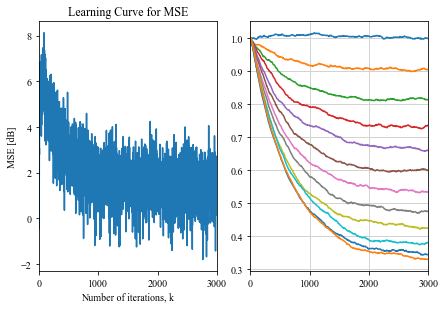

In [21]:
mse = []
wk_rec = []

for j in range(50):
    u = np.sqrt(sigma2_v) * rng.standard_normal(K)
    x = u
    d = signal.lfilter([1], a, x) + np.sqrt(sigma2_n) * rng.standard_normal(K)
    ex = LMS(N - 1, signal_complex=False)
    wk, ek = ex.affine_projection(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu_max*0.002, 'memory_length': 3})

    mse.append(abs(ek) ** 2)
    wk_rec.append(wk)
    
wk_avg = np.mean(wk_rec, axis=0)[:K]
mse_avg = np.mean(mse, axis=0)[:K]

plot_learning_curve(K)

In [22]:
print(wk_avg[-1])

[1.00111 0.90557 0.81546 0.73705 0.6616  0.60056 0.53592 0.47659 0.42424
 0.38112 0.34376 0.33076]


# Problem 31

In [23]:
b = np.array([0.32 + 0.21*1J, -0.3 + 0.7*1J, 0.5 - 0.8*1J, 0.2 + 0.5*1J]);
sigma2_n = 0.4
N = 4
mu_max = 1/(1)*np.sqrt(pi*sigma2_n/2)
K = 3000  # number of iterations
print('the mu value: %.3f' % mu_max)

the mu value: 0.793


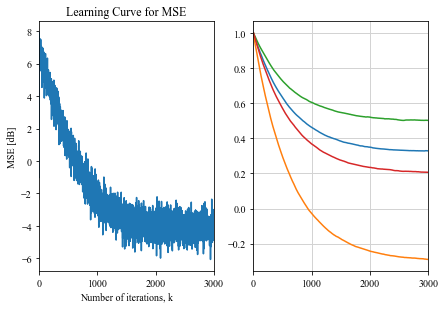

In [24]:
mse = []
wk_rec = []

for j in range(50):
    x = 1/np.sqrt(2) * (np.sign(rng.standard_normal(K)) + 1J * np.sign(rng.standard_normal(K)))
    d = signal.lfilter(b, [1], x) + np.sqrt(sigma2_n/2) * (rng.standard_normal(K) + 1J*rng.standard_normal(K))
    ex = LMS(N - 1, signal_complex=True)
    wk, ek = ex.affine_projection(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu_max*0.002, 'memory_length': 1})

    mse.append(abs(ek) ** 2)
    wk_rec.append(wk)
    
wk_avg = np.mean(wk_rec, axis=0)[:K]
mse_avg = np.mean(mse, axis=0)[:K]

plot_learning_curve(K)

In [25]:
print(wk_avg[-1])

[ 0.32822-0.20915j -0.28961-0.69218j  0.5014 +0.79123j  0.20622-0.49781j]


# Problem 32

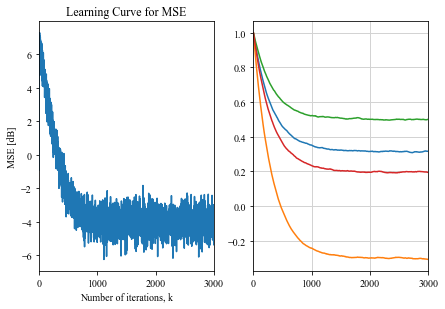

In [26]:
mse = []
wk_rec = []

for j in range(50):
    x = 1/np.sqrt(2) * (np.sign(rng.standard_normal(K)) + 1J * np.sign(rng.standard_normal(K)))
    d = signal.lfilter(b, [1], x) + np.sqrt(sigma2_n/2) * (rng.standard_normal(K) + 1J*rng.standard_normal(K))
    ex = LMS(N - 1, signal_complex=True)
    wk, ek = ex.affine_projection(d, x, **{'fir_order': N - 1, 'init_coefficients': np.ones(N), 'step': mu_max*0.002, 'memory_length': 4})

    mse.append(abs(ek) ** 2)
    wk_rec.append(wk)
    
wk_avg = np.mean(wk_rec, axis=0)[:K]
mse_avg = np.mean(mse, axis=0)[:K]

plot_learning_curve(K)

In [27]:
print(wk_avg[-1])

[ 0.31536-0.21106j -0.30802-0.69755j  0.50134+0.7984j   0.19409-0.5014j ]
